In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Read the diabetes dataset
data = pd.read_csv('./diabetes.csv')

In [3]:

# Check for null or missing values
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [4]:
# Replace zero values with mean values
for column in data.columns[1:-3]:
    data[column].replace(0, np.NaN, inplace=True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace=True)

In [5]:
# Perform Splitting
X = data.iloc[:, :8]  # Features
Y = data.iloc[:, 8:]  # Predictor

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [7]:
# KNN Classifier
knn = KNeighborsClassifier()
knn_fit = knn.fit(X_train, Y_train.values.ravel())
knn_pred = knn_fit.predict(X_test)

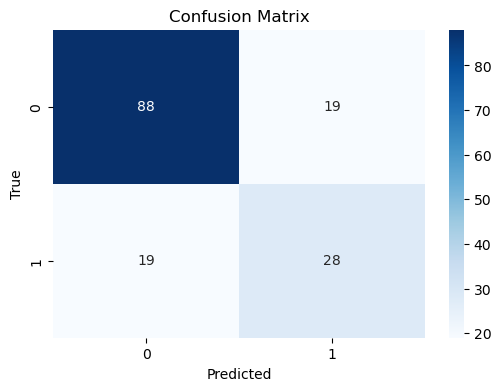

In [8]:
# Display the confusion matrix
conf_matrix = confusion_matrix(Y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Display other metrics
print("Accuracy Score:", accuracy_score(Y_test, knn_pred))
print("Recall Score:", recall_score(Y_test, knn_pred))
print("F1 Score:", f1_score(Y_test, knn_pred))
print("Precision Score:", precision_score(Y_test, knn_pred))


Accuracy Score: 0.7532467532467533
Recall Score: 0.5957446808510638
F1 Score: 0.5957446808510638
Precision Score: 0.5957446808510638


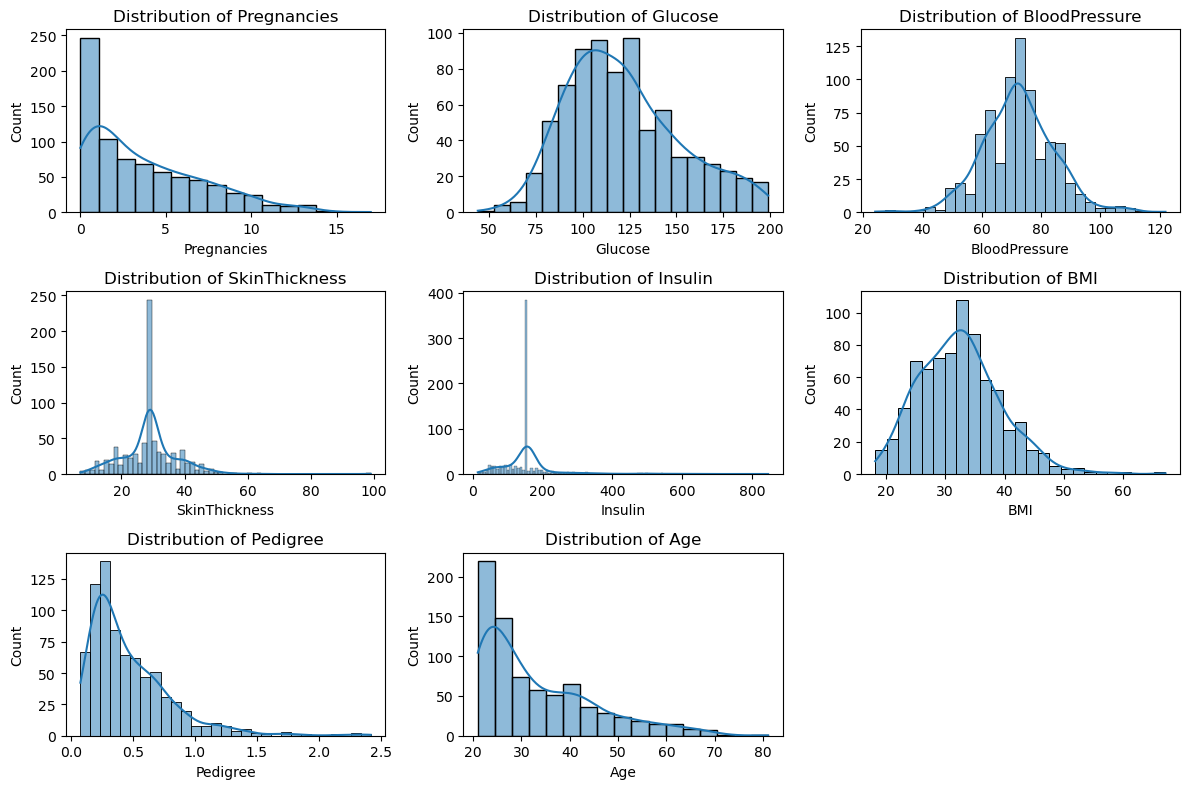

In [12]:
# Visualize data distribution with histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [13]:
print("Confusion Matrix")
print(confusion_matrix(Y_test, knn_pred))

Confusion Matrix
[[88 19]
 [19 28]]
